## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.591806 -1.265358  0.289815 -0.557562 -1.238539 -1.032070
1  0.895332  0.772733 -0.313628  1.304777 -0.955088  0.968435
2  1.500837  1.152551  1.170998  0.317384 -1.695932 -0.248289
3 -1.498522  1.554226  0.856266 -1.500895  0.273138 -1.453255
4 -0.382291 -0.693999 -0.604342 -0.351183 -0.548216 -0.826959


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0013623	total: 57.3ms	remaining: 57.3s
1:	learn: 0.9909642	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9806793	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9706236	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9623910	total: 59.4ms	remaining: 11.8s
5:	learn: 0.9522334	total: 59.9ms	remaining: 9.92s
6:	learn: 0.9411898	total: 60.6ms	remaining: 8.6s
7:	learn: 0.9302638	total: 61.4ms	remaining: 7.62s
8:	learn: 0.9210049	total: 61.9ms	remaining: 6.82s
9:	learn: 0.9120716	total: 62.5ms	remaining: 6.18s
10:	learn: 0.9021248	total: 63ms	remaining: 5.66s
11:	learn: 0.8924511	total: 63.5ms	remaining: 5.23s
12:	learn: 0.8832506	total: 64ms	remaining: 4.86s
13:	learn: 0.8731120	total: 64.5ms	remaining: 4.54s
14:	learn: 0.8655920	total: 65ms	remaining: 4.27s
15:	learn: 0.8591725	total: 65.5ms	remaining: 4.03s
16:	learn: 0.8508998	total: 66ms	remaining: 3.82s
17:	learn: 0.8427964	total: 66.5ms	remaining: 3.63s
18:	learn: 0.8343146	total: 66.9ms	remaining: 3.46s
1

87:	learn: 0.4421813	total: 103ms	remaining: 1.06s
88:	learn: 0.4387339	total: 103ms	remaining: 1.06s
89:	learn: 0.4353644	total: 104ms	remaining: 1.05s
90:	learn: 0.4321063	total: 105ms	remaining: 1.04s
91:	learn: 0.4281537	total: 105ms	remaining: 1.04s
92:	learn: 0.4245700	total: 106ms	remaining: 1.03s
93:	learn: 0.4208265	total: 106ms	remaining: 1.02s
94:	learn: 0.4180065	total: 107ms	remaining: 1.01s
95:	learn: 0.4142778	total: 107ms	remaining: 1.01s
96:	learn: 0.4112983	total: 107ms	remaining: 999ms
97:	learn: 0.4075287	total: 108ms	remaining: 992ms
98:	learn: 0.4042287	total: 108ms	remaining: 984ms
99:	learn: 0.4008161	total: 109ms	remaining: 978ms
100:	learn: 0.3976473	total: 109ms	remaining: 970ms
101:	learn: 0.3946184	total: 110ms	remaining: 965ms
102:	learn: 0.3915927	total: 110ms	remaining: 958ms
103:	learn: 0.3887229	total: 110ms	remaining: 951ms
104:	learn: 0.3859688	total: 111ms	remaining: 945ms
105:	learn: 0.3827103	total: 111ms	remaining: 940ms
106:	learn: 0.3795668	tot

256:	learn: 0.1301861	total: 186ms	remaining: 538ms
257:	learn: 0.1293840	total: 187ms	remaining: 537ms
258:	learn: 0.1284633	total: 187ms	remaining: 535ms
259:	learn: 0.1276600	total: 188ms	remaining: 534ms
260:	learn: 0.1267938	total: 188ms	remaining: 532ms
261:	learn: 0.1259123	total: 188ms	remaining: 531ms
262:	learn: 0.1250423	total: 189ms	remaining: 529ms
263:	learn: 0.1241917	total: 189ms	remaining: 527ms
264:	learn: 0.1234275	total: 190ms	remaining: 526ms
265:	learn: 0.1224535	total: 190ms	remaining: 524ms
266:	learn: 0.1215630	total: 190ms	remaining: 523ms
267:	learn: 0.1206426	total: 191ms	remaining: 522ms
268:	learn: 0.1196747	total: 191ms	remaining: 520ms
269:	learn: 0.1188883	total: 192ms	remaining: 519ms
270:	learn: 0.1181375	total: 193ms	remaining: 519ms
271:	learn: 0.1173213	total: 193ms	remaining: 518ms
272:	learn: 0.1164355	total: 194ms	remaining: 516ms
273:	learn: 0.1156936	total: 194ms	remaining: 515ms
274:	learn: 0.1149505	total: 195ms	remaining: 514ms
275:	learn: 

452:	learn: 0.0441189	total: 284ms	remaining: 343ms
453:	learn: 0.0438547	total: 285ms	remaining: 342ms
454:	learn: 0.0436445	total: 285ms	remaining: 342ms
455:	learn: 0.0434698	total: 286ms	remaining: 341ms
456:	learn: 0.0433600	total: 286ms	remaining: 340ms
457:	learn: 0.0431844	total: 287ms	remaining: 339ms
458:	learn: 0.0430703	total: 287ms	remaining: 339ms
459:	learn: 0.0428872	total: 288ms	remaining: 338ms
460:	learn: 0.0426828	total: 288ms	remaining: 337ms
461:	learn: 0.0425147	total: 288ms	remaining: 336ms
462:	learn: 0.0423695	total: 289ms	remaining: 335ms
463:	learn: 0.0422157	total: 289ms	remaining: 334ms
464:	learn: 0.0420269	total: 290ms	remaining: 333ms
465:	learn: 0.0418774	total: 290ms	remaining: 333ms
466:	learn: 0.0417641	total: 291ms	remaining: 332ms
467:	learn: 0.0416529	total: 291ms	remaining: 331ms
468:	learn: 0.0415108	total: 292ms	remaining: 330ms
469:	learn: 0.0413808	total: 292ms	remaining: 329ms
470:	learn: 0.0412733	total: 293ms	remaining: 329ms
471:	learn: 

623:	learn: 0.0207711	total: 367ms	remaining: 221ms
624:	learn: 0.0207195	total: 368ms	remaining: 221ms
625:	learn: 0.0206687	total: 368ms	remaining: 220ms
626:	learn: 0.0206029	total: 369ms	remaining: 219ms
627:	learn: 0.0205383	total: 369ms	remaining: 219ms
628:	learn: 0.0204245	total: 370ms	remaining: 218ms
629:	learn: 0.0203598	total: 370ms	remaining: 217ms
630:	learn: 0.0202358	total: 371ms	remaining: 217ms
631:	learn: 0.0201866	total: 372ms	remaining: 217ms
632:	learn: 0.0201199	total: 372ms	remaining: 216ms
633:	learn: 0.0200101	total: 373ms	remaining: 215ms
634:	learn: 0.0199623	total: 373ms	remaining: 215ms
635:	learn: 0.0198614	total: 374ms	remaining: 214ms
636:	learn: 0.0198135	total: 375ms	remaining: 214ms
637:	learn: 0.0197144	total: 375ms	remaining: 213ms
638:	learn: 0.0196676	total: 376ms	remaining: 212ms
639:	learn: 0.0196215	total: 376ms	remaining: 212ms
640:	learn: 0.0195398	total: 377ms	remaining: 211ms
641:	learn: 0.0194773	total: 377ms	remaining: 211ms
642:	learn: 

818:	learn: 0.0109142	total: 467ms	remaining: 103ms
819:	learn: 0.0108763	total: 468ms	remaining: 103ms
820:	learn: 0.0108527	total: 468ms	remaining: 102ms
821:	learn: 0.0107868	total: 469ms	remaining: 102ms
822:	learn: 0.0107519	total: 469ms	remaining: 101ms
823:	learn: 0.0107179	total: 470ms	remaining: 100ms
824:	learn: 0.0106795	total: 470ms	remaining: 99.7ms
825:	learn: 0.0106568	total: 471ms	remaining: 99.1ms
826:	learn: 0.0106112	total: 471ms	remaining: 98.5ms
827:	learn: 0.0105784	total: 472ms	remaining: 98ms
828:	learn: 0.0105145	total: 472ms	remaining: 97.4ms
829:	learn: 0.0104859	total: 473ms	remaining: 96.8ms
830:	learn: 0.0104546	total: 473ms	remaining: 96.2ms
831:	learn: 0.0104188	total: 473ms	remaining: 95.6ms
832:	learn: 0.0103969	total: 474ms	remaining: 95ms
833:	learn: 0.0103530	total: 474ms	remaining: 94.4ms
834:	learn: 0.0103099	total: 475ms	remaining: 93.8ms
835:	learn: 0.0102574	total: 475ms	remaining: 93.2ms
836:	learn: 0.0102387	total: 476ms	remaining: 92.7ms
837

987:	learn: 0.0067280	total: 551ms	remaining: 6.69ms
988:	learn: 0.0066991	total: 551ms	remaining: 6.13ms
989:	learn: 0.0066939	total: 552ms	remaining: 5.57ms
990:	learn: 0.0066689	total: 552ms	remaining: 5.01ms
991:	learn: 0.0066616	total: 553ms	remaining: 4.46ms
992:	learn: 0.0066285	total: 553ms	remaining: 3.9ms
993:	learn: 0.0066062	total: 553ms	remaining: 3.34ms
994:	learn: 0.0065737	total: 554ms	remaining: 2.78ms
995:	learn: 0.0065393	total: 554ms	remaining: 2.23ms
996:	learn: 0.0065241	total: 555ms	remaining: 1.67ms
997:	learn: 0.0065093	total: 555ms	remaining: 1.11ms
998:	learn: 0.0064740	total: 556ms	remaining: 556us
999:	learn: 0.0064428	total: 556ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

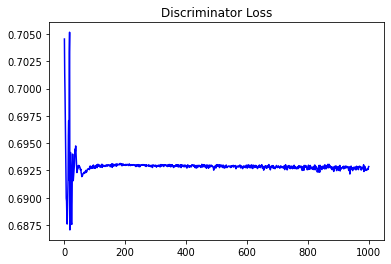

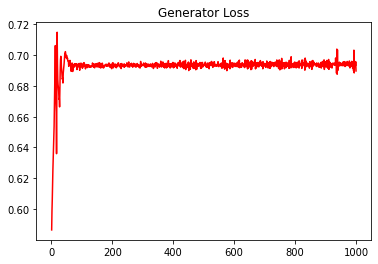

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.038690601364936204


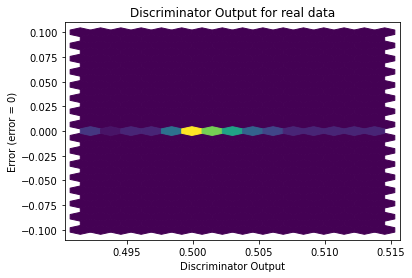

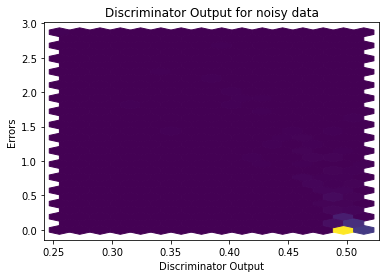

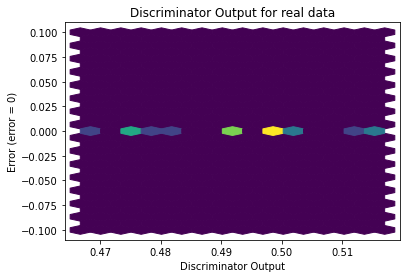

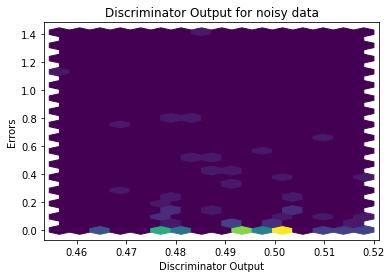

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


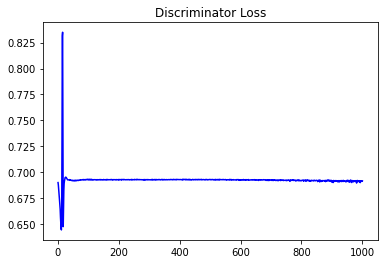

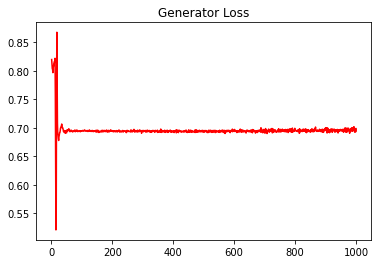

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04959491733755176


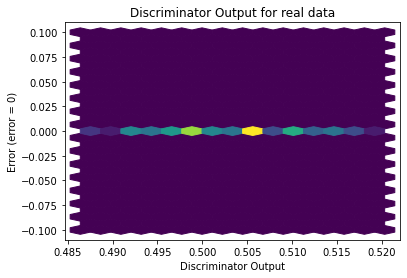

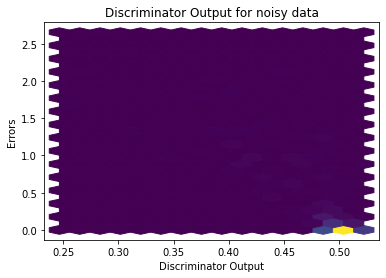

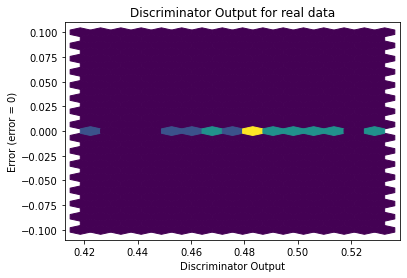

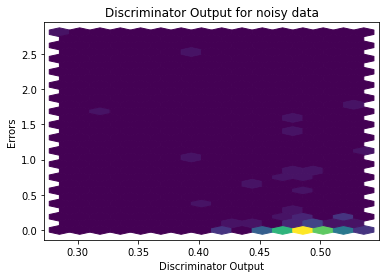

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0777]], requires_grad=True)
